In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('data_1024.csv.txt', sep='\t')
# df

In [5]:
data = df.get_values()[:,1:]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

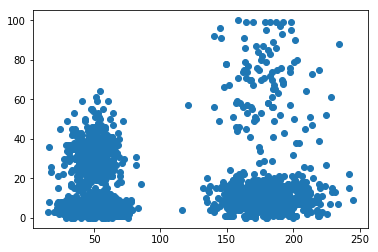

In [9]:
plt.scatter(data[:,0], data[:,1])

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score

In [25]:
k = 2
best_ch_score = 0
best_k = 2
patience = 0

for i in range(1000):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    labels = kmeans.labels_
    
    ch_score = calinski_harabaz_score(data, labels)
    print(k, ch_score)
    if ch_score > best_ch_score:
        best_ch_score = ch_score
        best_k = k
        k += 1
    else:
        patience += 1
        k += 1
        if patience == 10:
            break
        
print('Valor estimado de K é {} com Caliski-Harabaz score igual a {}'.format(best_k, best_ch_score))
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

(2, 33006.98608114745)
(3, 22533.174143459524)
(4, 21222.05360818438)
(5, 21762.302142309363)
(6, 25306.849150477577)
(7, 24691.044851079154)
(8, 24520.332376819548)
(9, 23558.17710270037)
(10, 23043.805912947093)
(11, 22717.685014975912)
(12, 22992.794735277803)
Valor estimado de K é 2 com Caliski-Harabaz score igual a 33006.9860811


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

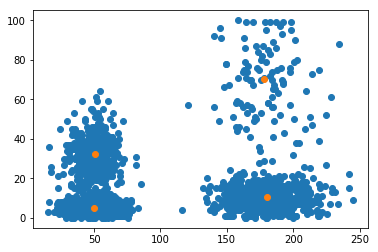

In [26]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

In [29]:
# data[kmeans.labels_ == 3]